<h3 align="center">Inteligencia Artificial - WS7A</h3> 

### Predicción de números manuscritos utilizando Redes Neuronales Artificiales (RNA)

El **conjunto de datos MNIST** es un acrónimo que significa el conjunto de datos **Modified National Institute of Standards and Technology**.

Es un conjunto de datos de 60.000 imágenes cuadradas pequeñas de 28 × 28 píxeles en escala de grises de un solo dígito escritas a mano entre 0 y 9.

Es un conjunto de datos ampliamente utilizado y ampliamente comprendido y, en su mayor parte, está **"resuelto"**. Los modelos de mejor rendimiento son redes neuronales convolucionales de aprendizaje profundo que logran una precisión de clasificación superior al 99%, con una tasa de error de entre 0,4% y 0,2% en el conjunto de datos de prueba de retención.

Gráfico de un subconjunto de imágenes del conjunto de datos MNIST 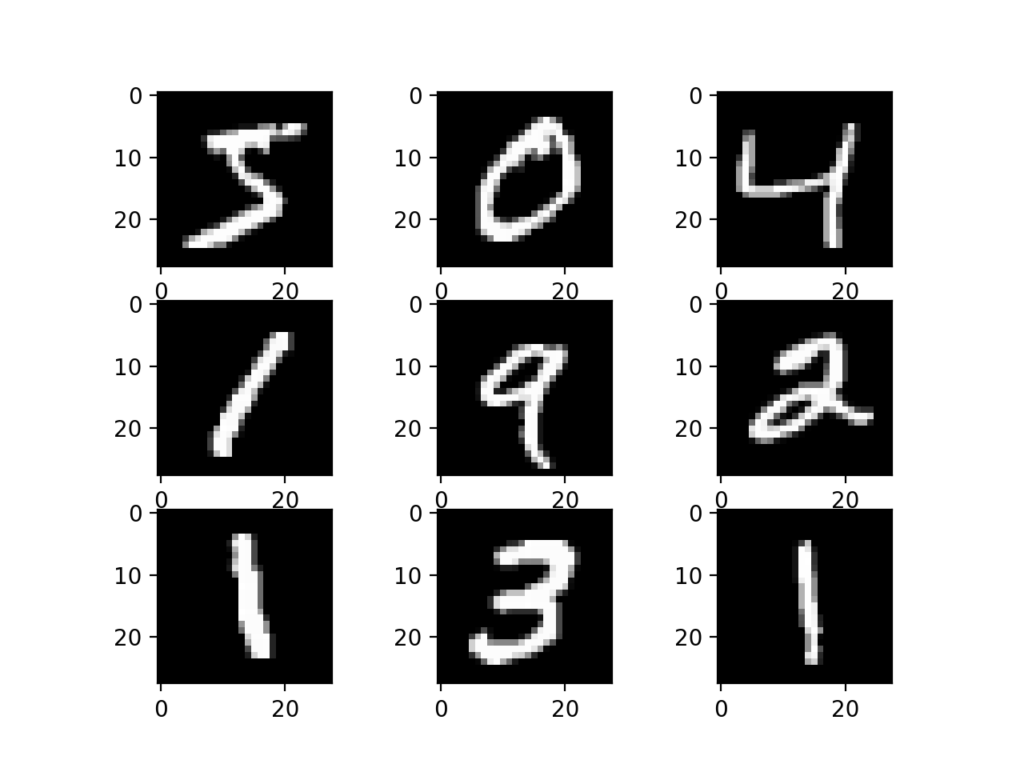

#### OBJETIVO

La tarea consiste en clasificar una imagen determinada de un dígito escrito a mano en una de las 10 clases que representan valores enteros del 0 al 9, utilizando redes neuronales artificiales (RNA)

#### 1. Importar las librerías necesarias

En este notebook se utilizará el dataset **MNIST** ubicado en en módulo de Tensorflow "tensorflow_datasets".  

Para instalarlo, ejecutar:

**pip install tensorflow_datasets**


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
# logging proporciona un marco flexible para emitir mensajes de registro desde programas Python
import logging 

In [5]:
logger = tf.get_logger()

logger.setLevel(logging.ERROR)

#### 2. Obtener el conjunto de datos y metadatos

In [6]:
# Desde la libreria tensorflow_datasets
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtenemos los 60,000 datos de entranmiento (train_dataset) y los 10,000 para evaluacion o prueba en test_dataset
train_dataset, test_dataset = dataset['train'], dataset['test']

c:\Users\jayka\Documents\Courses\artificial-intelligence\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:00<00:00,  2.03 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.51 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.43 url/s]


Dataset mnist downloaded and prepared to C:\Users\jayka\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


#### 3. Preparar los datos

* Definición de etiquetas de salida para visualizar el resultado de la red

In [7]:
# Deficinion de etiquetas de texto para cada posible salida de la red
class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

* Obtenemos en variables ejemplos de los datos de entrenamiento y prueba

In [8]:
# Obtencion de datos de ejemlo en variables
num_train_examples = metadata.splits['train'].num_examples #60,000 datos
num_test_examples = metadata.splits['test'].num_examples # 10,000 datos

* Creamos una función para normalizar los datos de cada imagen, donde el rango de los pixels sera de [0 a 1] en lugar de 0 a 255

In [9]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [10]:
# Ejecutamos la funcion de normalizacion en cada conjunto de datos (entrenamiento y pruebas)
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#### 4. Definir la estructura de la red

Los datos deberan ingresar a la red en una forma cuadrada de 28 x 28 (pixeles) por tanto, la capa de entrada de la red tendra 784 neuronas.

Adicionalmente, utilizaremos dos capas ocultas densas de 64 neuronas cada una y la capa de salida contara con 10 neuronas (1 neurona para clasificar los numeros de entrada del 0 al 9).

Utilizamos la funcion de activacion "relu" para las capas ocultas y "softmax" para la capa de salida (para las redes de clasificación).

In [11]:
#Estructura de la red
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),     # Capa de entrada con 784 neuronas 28 * 28 = 784
    tf.keras.layers.Dense(64, activation=tf.nn.relu),   # Capa oculta #1 con 64 neuronas
    tf.keras.layers.Dense(64, activation=tf.nn.relu),   # Capa oculta #2 con 64 neuronas
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Capa de salida (nos proporciona el resultado de la clasificacion
])

c:\Users\jayka\Documents\Courses\artificial-intelligence\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### 5. Crear y entrenar el modelo

Al crear el modelo, se debe especificar la función de costo a utilizar y el optimizador.

En nuestro caso, utilizaremos el optimizador "adam", el tipo de perdida (error) "sparse_categorical_crossentropy" y "accuracy" como tipo de metricas para evaluar el resultado.


In [12]:
#Indicar las funciones a utilizar
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Especificamos el tamaño de lote por entrenamiento (aprendizaje).

Al conjunto de datos de entrenamiento lo ordenamos de forma aleatoria y para ambos datasets indicamos el tamaño de lote para el aprendizaje.

In [13]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

Ejecutamos el entrenamiento de la red (aprendizaje automático) mediante la funcion **fit del modelo** creado.

Especificamos: los datos de entrenamiento (train_dataset), las epocas (epochs) que son la cantidad de iteracciones o vueltas completas a todos los datos del dataset, y los pasos por epoca (función matematica aplicada por epoca para los datos de ejemplo entre el numero de lote de entrenamiento).

In [14]:
#Realizar el aprendizaje
model.fit(
    train_dataset, epochs=5,
    steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE) 
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8569 - loss: 0.4923
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9606 - loss: 0.1295
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9712 - loss: 0.0949
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9821 - loss: 0.0576


#### 6. Evaluar el modelo

Una vez que la red está entrenada, utilizaremos el dataset de pruebas (test_dataset) para evaluar que tan bien resultó el aprendizaje automático.

Utilizaremos la función evaluate del modelo.

In [15]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples/BATCHSIZE)
)

print("Resultado en las pruebas: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9683 - loss: 0.1022
Resultado en las pruebas:  0.9685999751091003


Podemos observar que la red tiene un nivel de precisión o aprendizaje del 97%

#### 7. Visualización gráfica de los resultados

Los resultados de cada una de las predicciones (imagenes, etiquetas) hechas al conjunto de datos de prueba (test_dataset) las colocamos en una variable para luego visualizarlas via matplotlib.

In [16]:
# En la variable predictions colocamos cada uno de los resultados de las predicciones en el dataset de prueba
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Definimos una función para la visualizacion de los resultados (plot_image).

Si la predicción fue correcta, se visualizará el resultado (digito original y la etiqueta predicha) en color azul, de lo contrario lo mostrará en color rojo.

In [17]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

Adicionalmente, la siguiente función (plot_value_array) permitira visualiza una gráfica de barra al lado derecho del digito que fue predicho.  Si la predicción resultó correcta, la barra se pintará en azul, de lo contrario será de color rojo.

In [18]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Finalmente, mostramos la gráfica de 15 predicciones del detaset de prueba test_dataset en 5 filas y 3 columnas.

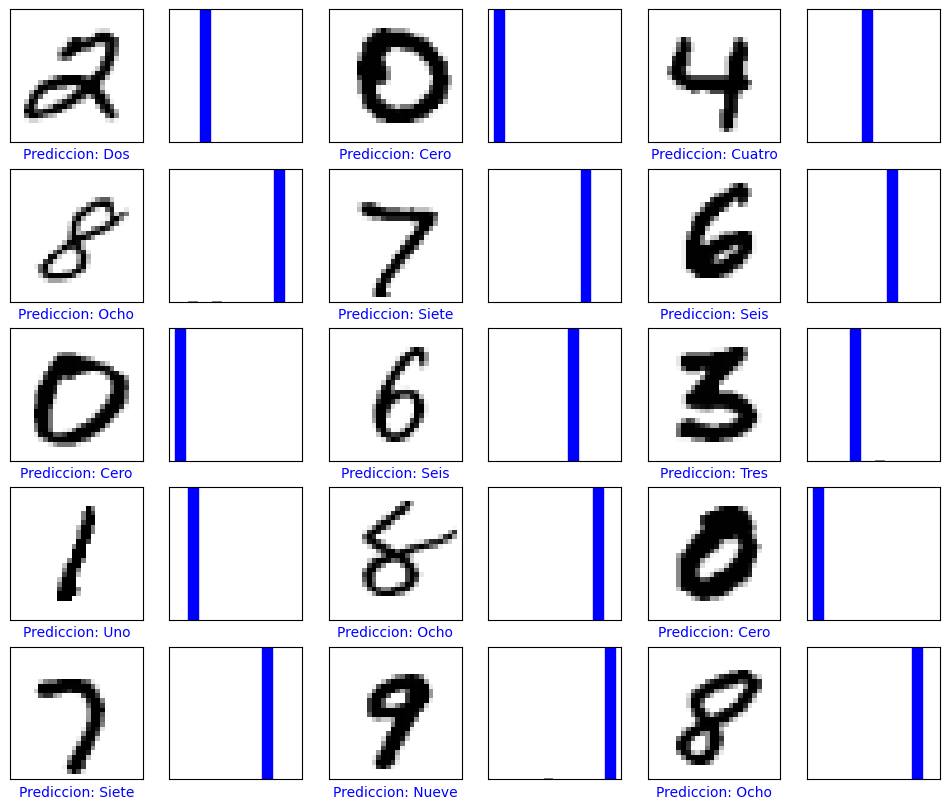

In [19]:
numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
    plt.subplot(numrows, 2*numcols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(numrows, 2*numcols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

Ahora, juguemos con nuestra red, modificando por ejemplo:

* El numero de capas, podemos agregar/quitar una capa oculta
* Numero de neuronas en las capas ocultas, en lugar de 64 neuronas por capa, que tal 20? o 10?

Cuál es la precisión de la red luego de dichos cambios?